# Prosper Loan Data Exploration
## by Audrey Dogbeh

## Preliminary Wrangling

The dataset includes 110,000+ listings of consumer loans provided by Prosper, with information on the borrower and loan details and status, among others.

In [26]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [27]:
# load in the dataset into dataframe
loans_original = pd.read_csv("prosperLoanData.csv")

In [28]:
loans = loans_original.copy()
print(loans.shape)
loans.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [29]:
# checking for duplicates
print(loans.duplicated().sum())
print(loans["ListingKey"].duplicated().sum())

0
871


In [30]:
loans.drop_duplicates(subset="ListingKey", keep=False, inplace=True)

In [31]:
loans["ListingKey"].duplicated().sum()

0

In [32]:
# how many loans are charged off, completed or defaulted?
closed_status = ["ChargedOff", "Completed", "Defaulted"]
loans[loans["LoanStatus"].isin(closed_status)].shape[0]

43066

This is a large enough sub-dataset to work with. Let's filter the relevant loans and columns (see features of interest below).

In [33]:
columns = ['ListingKey','LoanStatus','BorrowerAPR','ProsperRating (Alpha)','EmploymentStatus','DebtToIncomeRatio','IncomeRange','StatedMonthlyIncome','TotalProsperLoans','TotalProsperPaymentsBilled','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','LoanOriginalAmount','MonthlyLoanPayment']
loans = loans.loc[loans[loans["LoanStatus"].isin(closed_status)].index,columns]

In [34]:
loans.shape

(43066, 16)

In [35]:
# cleaning
loans.rename(columns={"ProsperRating (Alpha)":"ProsperRating", "ProsperPrincipalBorrowed":"PriorBorrowed", "ProsperPrincipalOutstanding" : "PriorOutstanding", "StatedMonthlyIncome": "MonthlyIncome", "TotalProsperLoans":"PriorLoans", "TotalProsperPaymentsBilled":"PriorOnTime"}, inplace = True)
loans["PriorLate"]=loans["ProsperPaymentsLessThanOneMonthLate"]+loans["ProsperPaymentsOneMonthPlusLate"]
loans.drop(columns=['ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate'], inplace=True)

In [36]:
# let's create a new column called Paid which is True is the loan is Completed and False in other cases.
loans["Paid"]=loans.LoanStatus == "Completed"

In [37]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43066 entries, 0 to 113935
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ListingKey          43066 non-null  object 
 1   LoanStatus          43066 non-null  object 
 2   BorrowerAPR         43041 non-null  float64
 3   ProsperRating       20643 non-null  object 
 4   EmploymentStatus    41105 non-null  object 
 5   DebtToIncomeRatio   40079 non-null  float64
 6   IncomeRange         43066 non-null  object 
 7   MonthlyIncome       43066 non-null  float64
 8   PriorLoans          8554 non-null   float64
 9   PriorOnTime         8554 non-null   float64
 10  PriorBorrowed       8554 non-null   float64
 11  PriorOutstanding    8554 non-null   float64
 12  LoanOriginalAmount  43066 non-null  int64  
 13  MonthlyLoanPayment  43066 non-null  float64
 14  PriorLate           8554 non-null   float64
 15  Paid                43066 non-null  bool   
dtypes: 

In [38]:
loans.describe()

,BorrowerAPR,DebtToIncomeRatio,MonthlyIncome,PriorLoans,PriorOnTime,PriorBorrowed,PriorOutstanding,LoanOriginalAmount,MonthlyLoanPayment,PriorLate
count,43041.000000,40079.000000,43066.000000,8554.000000,8554.000000,8554.000000,8554.000000,43066.000000,43066.00000,8554.000000
mean,0.212298,0.276669,5212.691768,1.351181,20.371639,7209.779016,2167.418154,6222.107718,220.45590,0.536825
std,0.087870,0.681915,6080.061939,0.697832,15.891981,6526.634708,3186.484374,5181.771732,185.68714,2.316551
min,0.006530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.00000,0.000000
25%,0.137050,0.120000,2916.666667,1.000000,9.000000,3000.000000,0.000000,2550.000000,94.69250,0.000000
50%,0.202000,0.190000,4333.333333,1.000000,15.000000,5000.000000,855.915000,4500.000000,170.89000,0.000000
75%,0.287280,0.300000,6400.000000,2.000000,29.000000,9500.000000,3181.502500,8000.000000,297.71500,0.000000
max,0.512290,10.010000,618547.833333,7.000000,120.000000,60001.000000,22586.670000,35000.000000,2251.51000,42.000000


### What is the structure of your dataset?

The *original* dataset has 113937 loans and 81 columns. Though the listing key and number should uniquely identify each listing, I found 871 duplicated listing keys (and numbers). Lacking more information, I filtered the rows with the duplicated keys out of the dataframe. 

Due to the high number of columns (81), the data dictionary was first explored in Google Sheets to understand the different variables and pre-select the variables of interest.

Since I am only interested in closed loans (excluding cancelled loans), my *actual* dataset has 43066 loans and 16 columns.

### What is/are the main feature(s) of interest in your dataset?

I am interested in the closed loans, either completed, defaulted or charged off, and what variables are best at predicting whether a loan is paid back in full (i.e. completed) or not.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that data like loan amount, borrower's income, Prosper rating, borrower's APR and whether the borrower had other current loans at the time they opened this loan (and debt-to-income ratio) will help support my investigation.

## Univariate Exploration

I'll start by looking at the variable I am interested in: the status of the loan at closure.

In [39]:
basis_color = sb.color_palette()[0]

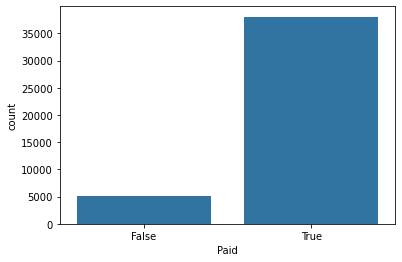

In [40]:
sb.countplot(data=loans, x="Paid", color = basis_color);

In [41]:
loans.Paid.value_counts()/loans.shape[0]

True     0.883481
False    0.116519
Name: Paid, dtype: float64

The majority (88.3%) of closed loans have been paid and completed as could be expected. However, in my opinion, 11.6% of defaulted loans is high when one considers the amount of debt this might represent for people and for Prosper. Since not all loans are the same amount, it would be worth exploring whether this proportion overestimates or underestimates the actual problem. 

In [42]:
loans.groupby(["Paid"]).LoanOriginalAmount.sum()/loans.LoanOriginalAmount.sum()

Paid
False    0.121476
True     0.878524
Name: LoanOriginalAmount, dtype: float64

It looks like the proportions in dollar amount are similar to the proportions in number of loans.

Let's plot loan amount, borrower's APR, Prosper rating, employment status, income, amount of prior loans, prior debt-to-income ratio and loan-to-income ratio in separate graphs.

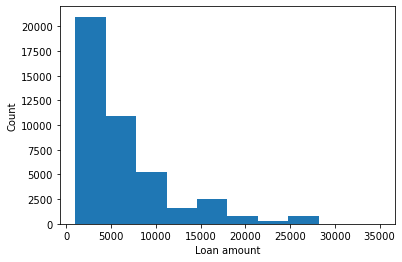

In [43]:
# loan amount
plt.hist(loans.LoanOriginalAmount)
plt.xlabel("Loan amount")
plt.ylabel("Count");

The distribution appears right-skewed. Let's see if anything interesting appears when increasing the bins.

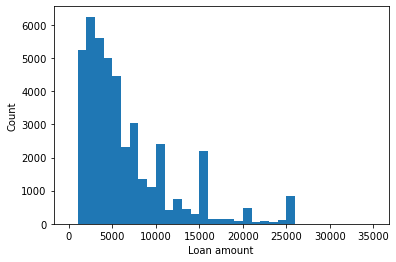

In [44]:
bins = np.arange(0,35000+1000,1000)
plt.hist(loans.LoanOriginalAmount, bins=bins)
plt.xlabel("Loan amount")
plt.ylabel("Count");

Zooming in gives a better overview of different modes, at 1000, 7000, 10000, 15000, 20000 and 25000 dollars. This can be due to a general understanding of dollars amounts in 5000 dollars bins and/or some standard loan amounts proposed by default by Prosper.

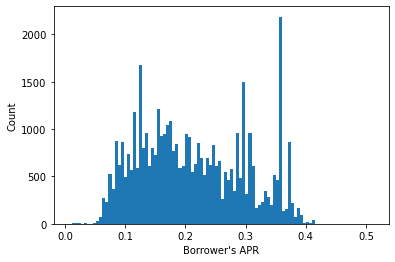

In [45]:
# borrower's APR
plt.hist(loans.BorrowerAPR, bins=100)
plt.xlabel("Borrower's APR")
plt.ylabel("Count");

The distribution of annual percentage looks skewed to the right until we zoom in by dividing the data in smaller bins, where it appears that we have several modes: between 0.1 and 0.2%, around 0.3 and again around 0.35%. Knowing that APR is the interest rate including fees, it might suggest that Prosper has standard loan rates around 0.1% and then 0.3-0.35% to which some fees are then added.

In [46]:
# Prosper rating
# Make Prosper ratings into categorical ordered data
ratings = ["HR","E","D","C","B","A","AA"]
ratings_types=pd.api.types.CategoricalDtype(ordered=True, categories=ratings)
loans.ProsperRating=loans.ProsperRating.astype(ratings_types)

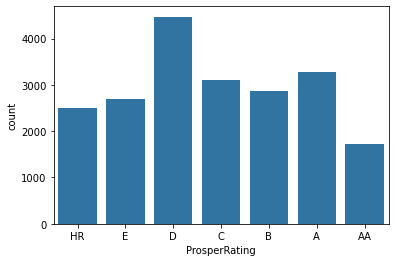

In [47]:
sb.countplot(data=loans, x="ProsperRating", color=basis_color);

The loans are more often with a "D" for the Prosper rating (which represents an estimated average annualized loss rate range to the investor). For info, "D" corresponds to an estimated loss between 9 and 12%. AA-rated loans are the least represented. It would be interesting to see a clustered bar chart with whether the loan was or was not paid for each loan rating.

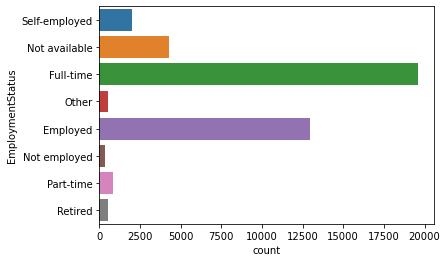

In [48]:
# Employment status
sb.countplot(data=loans, y="EmploymentStatus");

The employment status values are a bit confusing: what does "Employed" means if it is not full-time, nor part-time, nor self-employed? Since we cannot really make conclusions without more details, let's simplify the categories.

In [49]:
loans.EmploymentStatus.replace(["Self-employed","Full-time","Part-time"],"Employed", inplace=True)

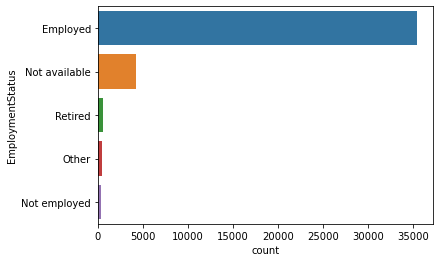

In [50]:
order=loans.EmploymentStatus.value_counts().index
sb.countplot(data=loans, y="EmploymentStatus", order=order);

The vast majority of borrowers in the dataset are employed. It could be interesting to see if there is an overrepresentation of unemployed or retired people in the borrowers who defaulted their loan.

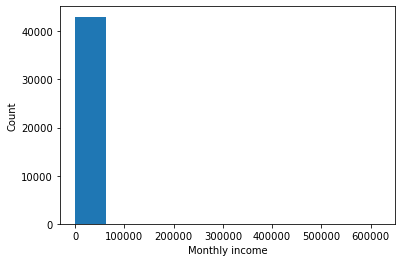

In [51]:
# income
plt.hist(loans.MonthlyIncome)
plt.xlabel("Monthly income")
plt.ylabel("Count");

The graph is useless because of one or several outliers dragging the range past 600,000 dollars. It is difficult to say whether the value is a mistake or not but it does seem extremely high, especially for someone needing to borrow money. Let's zoom in on the leftmost part of the distribution.

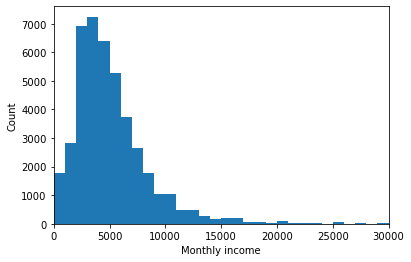

In [52]:
bins = np.arange(0, 50000,1000)
plt.hist(loans.MonthlyIncome, bins=bins)
plt.xlim(0,30000)
plt.xlabel("Monthly income")
plt.ylabel("Count");

The distribution of monthly income is right-skewed with a mode around 3000 dollars.

In [53]:
# looking at the tail
loans.MonthlyIncome.sort_values().tail(20)

27013      75000.000000
11312      75000.000000
4691       75000.000000
45648      75916.666667
93680      78333.333333
59542      78364.416667
20708      78364.416667
69108      80000.000000
15355      83333.333333
59263      83333.333333
59928      96266.500000
48469     100000.000000
35218     108333.333333
111265    108750.000000
63925     140416.666667
83697     185081.750000
56867     185081.750000
8066      416666.666667
17411     483333.333333
53014     618547.833333
Name: MonthlyIncome, dtype: float64

In [54]:
(loans.MonthlyIncome > 50000).sum()

34

There seems to be several other values of monthly income that are very high, and it is interesting to see so many decimals for some of them. It is as if the value has been calculated automatically by dividing another value. Indeed, 83,333.333333 * 12 = 1,000,000, for example. These values may have been input incorrectly in the system. Indeed, the highest loan value is 35,000 dollars and it would seem unrealistic that a person earning more than 100,000 dollars a month would need a loan but who knows. There are a lot of values above 10,000 dollars so it would be a large chuck to discard. Let's look at the yearly income ranges.

In [55]:
ranges = ["Not displayed","Not employed","$0","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"]
ranges_types=pd.api.types.CategoricalDtype(ordered=True, categories=ranges)
loans.IncomeRange=loans.IncomeRange.astype(ranges_types)

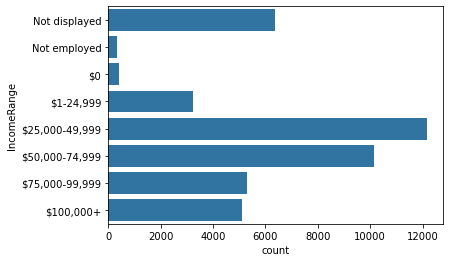

In [56]:
sb.countplot(data=loans, y="IncomeRange", color = basis_color);

It is odd that so many incomes are in the category "Not display" when there are no missing values of monthly income. Besides the range of 0 dollars is difficult to interpret since there is a "not employed" category. The category 100,000+ seems to agree with the findings about monthly income.
I will filter out outliers above 50,000 dollars a month to start with.

In [57]:
loans=loans[loans.MonthlyIncome <= 50000]

In [58]:
# Prior loans
# let's first change null values to 0, since the variable definition says that null means no prior loan

loans.PriorLoans.fillna(0, inplace=True)

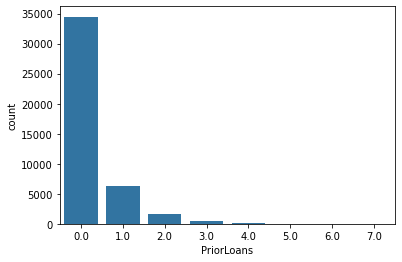

In [59]:
sb.countplot(data=loans,x="PriorLoans", color=basis_color);

The distribution is right-skewed with a mode at 0 prior loan. This means that most borrowers in the dataset are first-time borrowers.

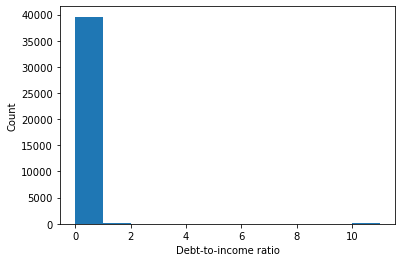

In [60]:
# Prior debt-to-income ratio, variable DebtToIncomeRatio
bins = np.arange(0, 10.01+1, 1)
plt.hist(loans.DebtToIncomeRatio, bins=bins)
plt.xlabel("Debt-to-income ratio")
plt.ylabel("Count");

Most values are concentrated between 0 and 1 (i.e. 0 to 100% debt-to-income ratio) with some outliers above or equal to 10 (including 10.01 which includes all values above 10, according to the variable definition). Let's zoom in on the left part.

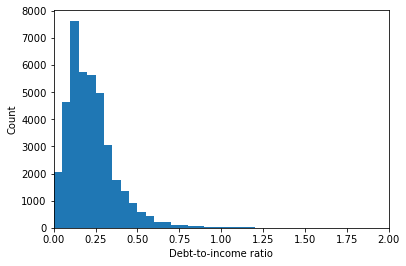

In [61]:
bins = np.arange(0, 10.01+0.05, 0.05)
plt.hist(loans.DebtToIncomeRatio, bins=bins)
plt.xlim(0,2)
plt.xlabel("Debt-to-income ratio")
plt.ylabel("Count");

There is a mode between 0.1 and 0.15, i.e. between 10 and 15% debt-to-income ratio. The distribution is right-skewed. It is my understanding that the debt-to-income ratio is relative to the yearly income since Prosper has a maximum debt-to-income ratio of 50% (excluding mortgage). With this last detail it is surprising that we have value much higher than that. It would make sense to filter outliers out, to concentrate the analysis. Mortgages could account for some outliers, so I'll keep anything under 100%.

In [62]:
# filtering out outliers above 2
loans = loans[loans.DebtToIncomeRatio <= 1]

In [63]:
loans.shape

(39602, 16)

In [64]:
# Loan-to-income ratio (yearly income)
loans["LoanToIncome"] = loans.LoanOriginalAmount / (loans.MonthlyIncome * 12)

In [65]:
# replacing infinite values (because no income) by NaN
loans.LoanToIncome.replace(np.inf,np.nan, inplace=True)

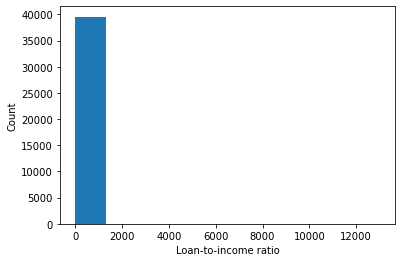

In [66]:
plt.hist(loans.LoanToIncome)
plt.xlabel("Loan-to-income ratio")
plt.ylabel("Count");

In [67]:
loans[loans.LoanToIncome > 5]

,ListingKey,LoanStatus,BorrowerAPR,ProsperRating,EmploymentStatus,DebtToIncomeRatio,IncomeRange,MonthlyIncome,PriorLoans,PriorOnTime,PriorBorrowed,PriorOutstanding,LoanOriginalAmount,MonthlyLoanPayment,PriorLate,Paid,LoanToIncome
146,34B03365511229087456DB5,Completed,0.09939,NaN,NaN,0.07000,Not displayed,0.083333,0.0,NaN,NaN,NaN,4000,127.66,NaN,True,4000.016000
2712,425C336513689711757D762,Completed,0.20936,NaN,NaN,0.16000,Not displayed,0.083333,0.0,NaN,NaN,NaN,6001,223.63,NaN,True,6001.024004
7856,561C3365324812163286633,Completed,0.15878,NaN,NaN,0.08785,Not displayed,0.083333,0.0,NaN,NaN,NaN,1925,66.68,NaN,True,1925.007700
10432,03F93378437542632E353B4,Completed,0.10692,NaN,Not available,0.13000,Not displayed,0.083333,0.0,NaN,NaN,NaN,5000,161.34,NaN,True,5000.020000
11162,8C873364756232474A96FA6,Completed,0.12198,NaN,NaN,0.28367,Not displayed,0.083333,0.0,NaN,NaN,NaN,6500,214.34,NaN,True,6500.026000
13102,DB753365513275845BF312F,Completed,0.17722,NaN,NaN,0.14000,Not displayed,0.083333,0.0,NaN,NaN,NaN,4000,142.61,NaN,True,4000.016000
13773,9A5D336898090446104FCED,Completed,0.16802,NaN,Not available,0.30000,Not displayed,0.083333,0.0,NaN,NaN,NaN,1000,34.67,NaN,True,1000.004000
15570,12C83372948210900269255,Completed,0.20735,NaN,Not available,0.27000,Not displayed,0.083333,0.0,NaN,NaN,NaN,11000,408.80,NaN,True,11000.044000
16613,74343364451129388F594D2,Completed,0.09437,NaN,NaN,0.09601,Not displayed,0.083333,0.0,NaN,NaN,NaN,3000,95.05,NaN,True,3000.012000
19270,1A3033984511764575B6A5F,Completed,0.11947,NaN,Employed,0.47000,"$25,000-49,999",2.500000,0.0,NaN,NaN,NaN,11500,377.86,NaN,True,383.333333


There are outliers, who seem to be characterized by a very low MonthlyIncome, even though they are employed. This is difficult to interpret, maybe these were not input and defaulted to this value? It would be good to filter the outliers out. For consistency with DebtToIncomeRatio let's keep anyhting under 1.

In [68]:
loans=loans[loans.LoanToIncome <= 1]

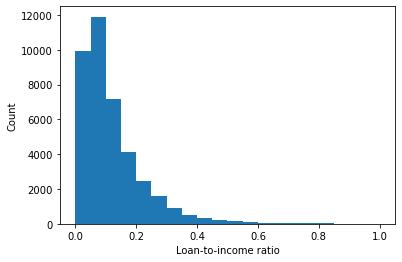

In [69]:
bins = np.arange(0,1+0.05,0.05)
plt.hist(loans.LoanToIncome, bins=bins)
plt.xlabel("Loan-to-income ratio")
plt.ylabel("Count");

The distribution is right-skewed with a mode between 5% and 10% loan-to-income ratio.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I created a column "Paid" which is True is the loan status is "Completed" and False otherwise. There are more loans that were completed than not, which is expected, though more than 11% defaulted or charged off loans is a high number in my opinion.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- I found it unusual to find such high monthly incomes in the dataset, from a common sense perspective but also that these values could be found within a list of people needing to borrow money. I cannot necessarily discard the values yet, so I'll keep this in mind for later exploration. The monthly income distribution was otherwise not unusual in shape.
- I made the variable "IncomeRange" into a categorical ordered data, so the data will automatically appear in order of increasing values on visualisations
- I made the variable "ProsperRating" into categorical ordered data, so the data will automatically appear in order of loan risk on visualisations
- I gathered the "EmploymentStatus" values "Employed", "Full-time" and "Part-time" into the category "Employed" because there is not explanation in the variable definition about how "Employed" is different than either "Part-time" or "Full-time".
- I had to fill the null value of variable "PriorLoans" with 0 because the definition of the variable explains that a null value means no prior loan.
- I created a column to calculate the loan to yearly income ratio, variable "LoanToIncome", because I think it is a better explanatory variable than just the loan amount or the person's income.
- I filtered out DebtToIncomeRatio and LoanToIncome values above 1 to get more visibility on the vast majority of data points.

## Bivariate Exploration

Let's explore relationships between numerical variables.

In [70]:
num_vars = ["LoanOriginalAmount", "BorrowerAPR","MonthlyIncome", "DebtToIncomeRatio", "LoanToIncome"]

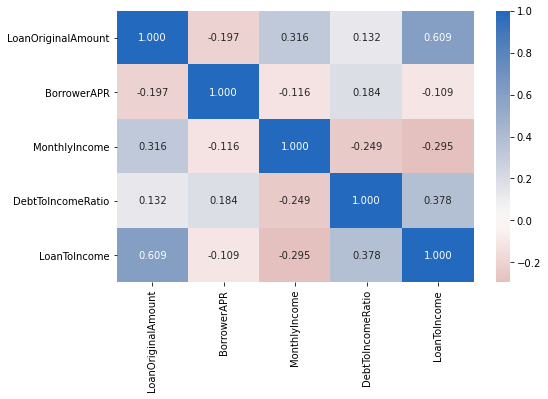

In [71]:
plt.figure(figsize = [8, 5])
sb.heatmap(loans[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

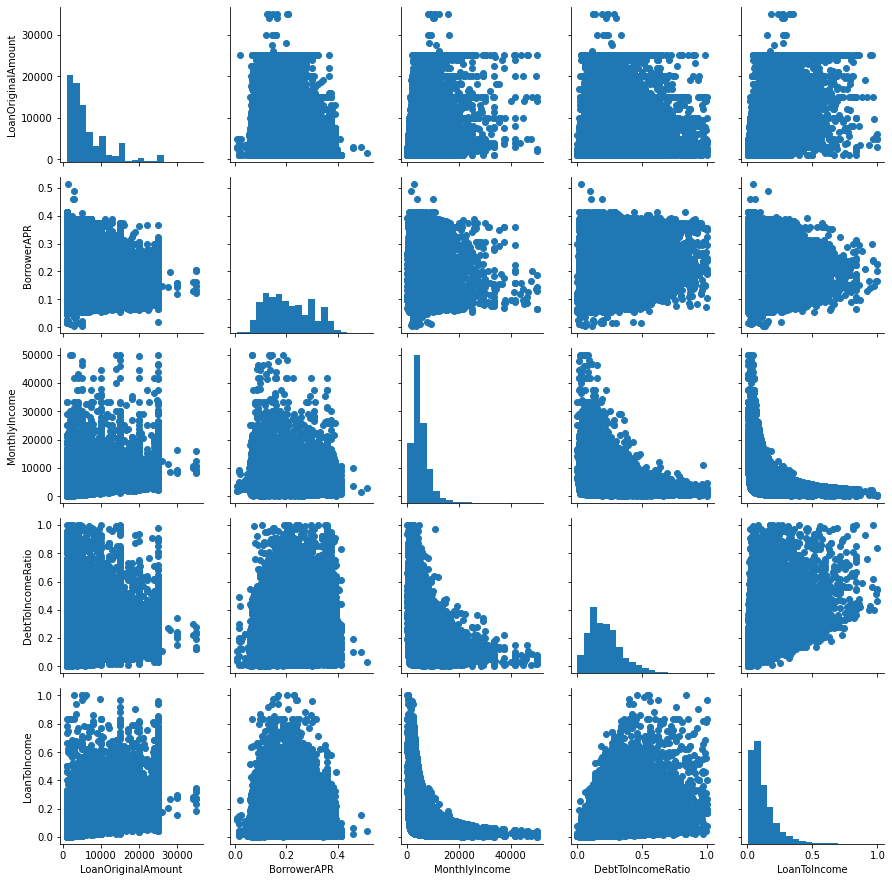

In [72]:
g = sb.PairGrid(data = loans, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

- There is a moderate positive correlation between the DebtToIncomeRatio and LoanToIncome ratio. This suggests that the more debt-to-income a person has prior to applying for a loan, the more money (compared to their income) they are borrowing. This could be explained by the fact that people borrow to consolidate their debt.

- There is a moderate positive correlation between the loan-to-income ratio and the amount of the loan which is expected. However the scatter plot shows that even with relatively small loan amounts, some people incur a debt of more than 100% of their annual income.

- There is a weak negative correlation between the monthly income and the loan-to-income ratio (also with debt-to-income ratio) and a moderate positive correlation between the monthly income and the loan amount. This suggests that borrowers with higher incomes also borrow more. It seems counter intuitive but it makes sense that Prosper would be more inclined to accept a loan application for high amounts for people with a higher monthly income.

Let's look at the relationships between the categorical values "Paid" and "Rating" and some numerical values.

In [73]:
#Create a sample of loans for clarity
loans_samp = loans.sample(10000)

C:\Users\adogbeh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adogbeh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adogbeh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adogbeh

<Figure size 720x720 with 0 Axes>

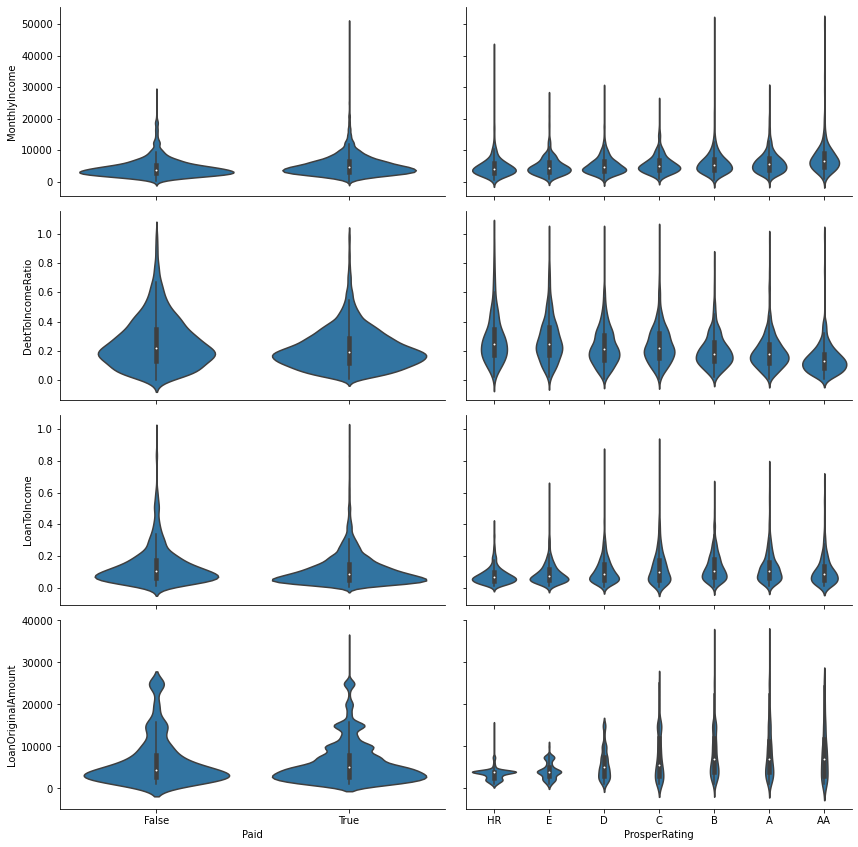

In [74]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating violin plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.violinplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loans_samp, y_vars = ['MonthlyIncome', 'DebtToIncomeRatio',"LoanToIncome","LoanOriginalAmount"], x_vars = ["Paid","ProsperRating"],
                height = 3, aspect = 2)
g.map(boxgrid)
plt.show();

It appears that loans which where not repaid in full are generally higher amounts than the ones that were repaid. We need to look at ratios to income to better analyse the result. The loan-to-income ratios of unpaid loans are generally higher. It is the debt-to-income ratio which sheds more light on a pattern: higher values of prior debt-to-income ratios are more related to unpaid loans. Also unpaid loans relate to people with lower monthly incomes. This is also worth looking into.

Regarding the ProperRating there seems to be a negative relationships between the debt-to-income ratio and the rating. This is expected since the Prosper rating takes into account the borrower's credit rating, which is affected by the amount of debt a person has. The Prosper rating is generally positively correlated with the other values. Higher loan amounts are generally found in loans with higher ratings.

Let's now look at relationships between categorical values with clustered bar charts.

In [75]:
# Loan status VS Prosper rating
# let's rearrange dat to feed into seaborn catplot
cat1=loans.groupby(["ProsperRating"])["Paid"].value_counts(normalize=True).mul(100)
cat1=cat1.reset_index(name="percent")
cat1

,ProsperRating,Paid,percent
0,HR,True,91.596639
1,HR,False,8.403361
2,E,True,92.771619
3,E,False,7.228381
4,D,True,93.606724
5,D,False,6.393276
6,C,True,95.985790
7,C,False,4.014210
8,B,True,97.067558
9,B,False,2.932442


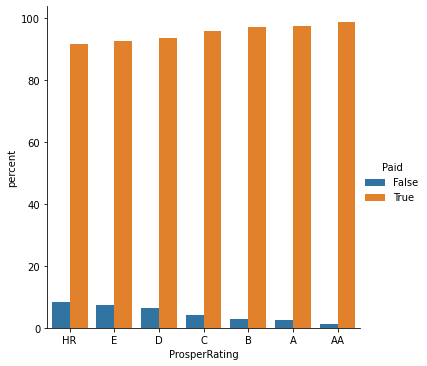

In [76]:
sb.catplot(data=cat1, x="ProsperRating",y="percent", hue="Paid", kind="bar");

It appears clearly that the lower rated the loan (i.e. the more risky the loan), the higher chance that the loan won't be repaid. This shows that Prosper's rating is quite accurate.

In [77]:
# Loan status VS employment status
cat2=loans.groupby(["EmploymentStatus"])["Paid"].value_counts(normalize=True).mul(100)
cat2=cat2.reset_index(name="percent")
cat2

,EmploymentStatus,Paid,percent
0,Employed,True,91.122283
1,Employed,False,8.877717
2,Not available,True,72.210012
3,Not available,False,27.789988
4,Not employed,True,91.666667
5,Not employed,False,8.333333
6,Other,True,89.460154
7,Other,False,10.539846
8,Retired,True,88.723404
9,Retired,False,11.276596


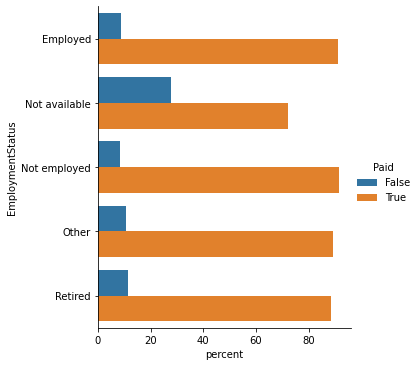

In [78]:
sb.catplot(data=cat2, y="EmploymentStatus",x="percent", hue="Paid", kind="bar");

There does not seem to be a great difference between employed and unemployed people, which is surprising. However, a high percentage of the people for whom we do not have emplyment status figure in the False category of Paid. It is unfortunate that we do not have information of these borrowers as it makes it difficult to conclude anythin from this graph.
However, we can see that retired people are more likely to default on their loan.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The incidence of unpaid loans seems positively correlated with the prior debt-to-income ratio, the Prosper rating, the loan amount and the employment status.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The debt-to-income and loan-to-income ratios are moderately positively correlated, which could suggest that a loan is applied for to help consolidate other debts. In some way, debt seems to incur more debt.

## Multivariate Exploration

I would like to understand how prior debt-to-income ratio and loan-to-income ratio interact together with the incidence of unpaid loans. This is one categorical variable and two numerical variables.

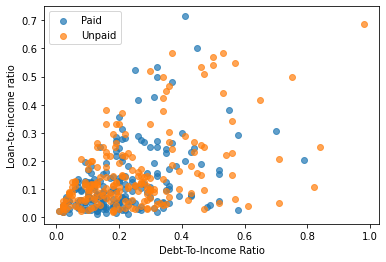

In [81]:
loans_paid = loans[loans['Paid'] == True].sample(200)
loans_unpaid = loans[loans['Paid'] == False].sample(200)
plt.scatter(data = loans_paid, x = 'DebtToIncomeRatio', y = 'LoanToIncome',alpha=0.7)
plt.scatter(data = loans_unpaid, x = 'DebtToIncomeRatio', y = 'LoanToIncome', alpha=0.7)
plt.legend(['Paid','Unpaid'])
plt.xlabel("Debt-To-Income Ratio")
plt.ylabel("Loan-to-income ratio");

I took a sample of 200 paid loans and 200 unpaid loans to avoid overplotting. We can clearly observe that points in the upper right part of the figure are majoritarily from the unpaid sample. Besides the numerical variables are visibly positively correlated, so people with higher debts in relation to their income are also more likely to borrow a high amount in relation to their income. And also more likely to no repay the loan in full.

I would like to then understand how the Prosper rating and the debt-to-income ratio interact together, since they seem to both be well correlated to the incidence of unpaid loans.

C:\Users\adogbeh\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


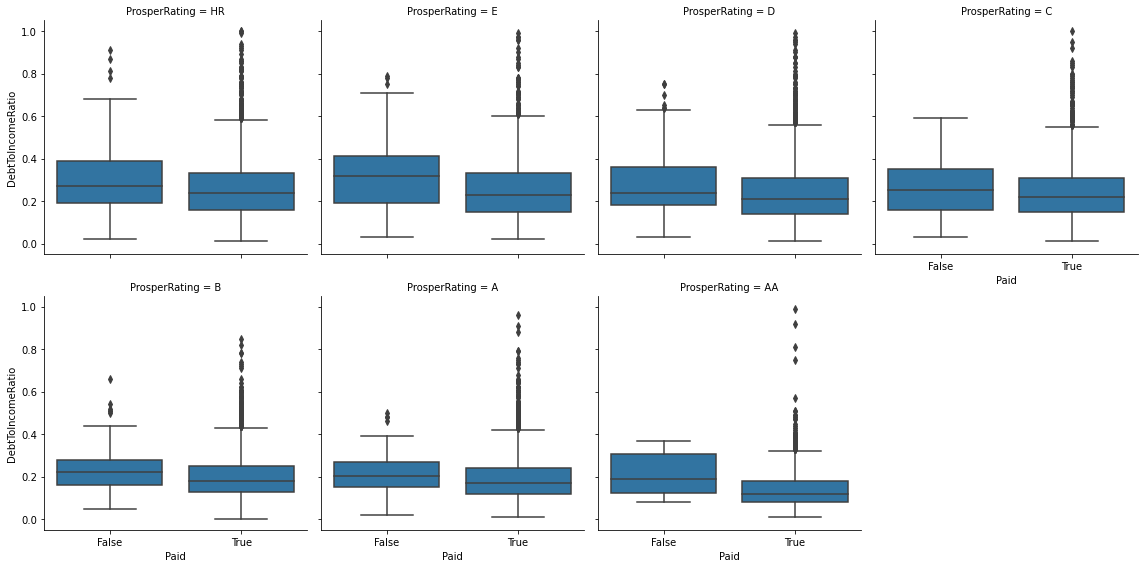

In [82]:
g = sb.FacetGrid(data = loans, col = 'ProsperRating', height = 4, col_wrap=4)
g.map(sb.boxplot, 'Paid', 'DebtToIncomeRatio');

We can see on the plots that a higher rating is associated with decreasing debt-to-income ratios, but that in every single loan rating category, the debt-to-income ratio is positively related to the incidence of default of loan.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest? Were there any interesting or surprising interactions between features?

We had observed that the debt-to-income ratio was positively correlated with unpaid loans. By adding the ProsperRating in the relationship, I observed that this relationship is visible across the ratings. This means that even for very well rated loans (AA), the debt-to-income ratio is a good predictor of unpaid loan. This is most visible in the AA and E ratings.
I also observed that the debt-to-income ratio is in itself a predictor of unpaid loans, but that this is reinforced by an increas of the loan-to-income ratio. This suggests that having previous debts made it more difficult to repay the loan in the dataset.

In [83]:
loans.to_csv("loans_clean.csv", index=False)